Importing Required Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf
from keras.layers import Dense, Flatten,Conv2D , MaxPool2D , Dropout
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import os
import glob
from PIL import Image,ImageOps,ImageEnhance

Data Pre-processing

In [ ]:
labels = ['NEU-TRAIN/Crazing','NEU-TRAIN/inclusion','NEU-TRAIN/patches','NEU-TRAIN/rolled-in-scale','NEU-TRAIN/scratches','NEU-TRAIN/pitted surface',
          'NEU-TEST/Crazing','NEU-TEST/inclusion','NEU-TEST/patches','NEU-TEST/rolled-in-scale','NEU-TEST/scratches','NEU-TEST/pitted surface']

for label in labels:
    f = 'drive/My Drive/' + label    
    
    new_d = 224
    for file in os.listdir(f):
        f_img = f+'/'+file
        try:
            img = Image.open(f_img)
           
            img = img.resize((new_d, new_d))
            
            img = ImageOps.equalize(img, mask = None)

            
            
            img.save(f_img)
        except IOError:
            pass

In [ ]:
train = 'drive/My Drive/NEU-TRAIN'
test = 'drive/My Drive/NEU-TEST'

Data Augmentation

In [ ]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

training_set = train_datagen.flow_from_directory(
        train,
        target_size=(224, 224),
        batch_size=64,
        class_mode='categorical',
        shuffle =True)


test_set = test_datagen.flow_from_directory(
        test,
        target_size=(224, 224),
        batch_size=64,
        class_mode='categorical',
        shuffle = True)

Found 1224 images belonging to 6 classes.
Found 576 images belonging to 6 classes.


Building CNN Model

In [ ]:
model = Sequential()

model.add(Conv2D(32, (3, 3), activation="relu", input_shape=(224, 224, 3)))

model.add(MaxPool2D(pool_size = (2, 2)))

model.add(Dropout(0.2))

model.add(Conv2D(64, (3, 3), activation="relu", input_shape=(32, 32, 3)))

model.add(MaxPool2D(pool_size = (2, 2)))

model.add(Dropout(0.2))

model.add(Conv2D(64, (3, 3), activation="relu"))

model.add(MaxPool2D(pool_size = (2, 2)))

model.add(Flatten())

model.add(Dense(activation = 'relu', units = 128))

model.add(Dense(activation = 'relu', units = 64))

model.add(Dense(activation = 'relu', units = 32))

model.add(Dense(activation = 'softmax', units = 6))

model.compile(optimizer = 'adam', loss = 'categorical_crossentropy',metrics= ['accuracy'])

Training Model

In [ ]:
my_callbacks = [
    tf.keras.callbacks.EarlyStopping(patience=2),
    
    tf.keras.callbacks.TensorBoard(log_dir='./logs')
]
cnn_model = model.fit(training_set,
                         steps_per_epoch = len(training_set),
                         epochs = 30,
                         validation_data = test_set,
                         validation_steps =len(test_set),
                        verbose =1,
                      #callbacks = my_callbacks
                         
                         )

Epoch 1/30
20/20 [==============================] - 14s 693ms/step - loss: 2.7223 - accuracy: 0.1844 - val_loss: 1.7729 - val_accuracy: 0.1701
Epoch 2/30
20/20 [==============================] - 14s 678ms/step - loss: 1.7494 - accuracy: 0.1681 - val_loss: 1.7475 - val_accuracy: 0.1944
Epoch 3/30
20/20 [==============================] - 14s 686ms/step - loss: 1.6837 - accuracy: 0.2180 - val_loss: 1.6352 - val_accuracy: 0.3368
Epoch 4/30
20/20 [==============================] - 14s 681ms/step - loss: 1.6004 - accuracy: 0.2906 - val_loss: 1.4109 - val_accuracy: 0.5000
Epoch 5/30
20/20 [==============================] - 14s 692ms/step - loss: 1.3908 - accuracy: 0.4103 - val_loss: 1.1932 - val_accuracy: 0.4774
Epoch 6/30
20/20 [==============================] - 14s 679ms/step - loss: 0.9847 - accuracy: 0.6214 - val_loss: 1.1254 - val_accuracy: 0.5087
Epoch 7/30
20/20 [==============================] - 14s 685ms/step - loss: 1.0285 - accuracy: 0.6015 - val_loss: 0.8685 - val_accuracy: 0.7309

In [ ]:
cnn_model.history

Accuracy Plot

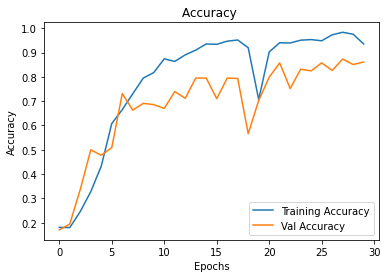

In [ ]:
acc = cnn_model.history['accuracy']
val_acc = cnn_model.history['val_accuracy']
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc,label='Val Accuracy')
plt.title('Accuracy ')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Loss Plot

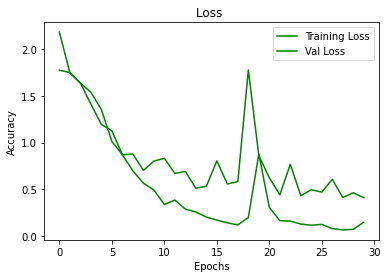

In [ ]:
loss = cnn_model.history['loss']
val_loss = cnn_model.history['val_loss']

plt.plot(loss,'g', label='Training Loss')
plt.plot(val_loss,'g', label='Val Loss')
plt.title('Loss ')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()